# DS-SF-34 | 16 | Trees | Assignment | Answer Key

In [1]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

from sklearn import tree, ensemble, metrics, model_selection, externals

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

Today we are revisiting the `boston` dataset from class 5.

## Dataset documentation

The Boston dataset concerns itself with housing values in suburbs of Boston.  A description of the dataset is as follows:

- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sqft
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate (per ten thousands of dollars)
- PTRATIO: pupil-teacher ratio by town
- B: 1000(Bk - .63)^2 where Bk is the proportion of blacks by town
- LSTAT: % lower status of the population
- MEDV: Median value of owner-occupied homes (in thousands of dollars)

## Optional: Installing Graphviz

- macOS
  - Type `conda install graphviz` at the command line
- Windows
  - Download and install the MSI file: http://www.graphviz.org/Download_windows.php
  - Add it to your Path: Go to Control Panel, System, Advanced System Settings, Environment Variables.  Under system variables,edit "Path" to include the path to the "bin" folder, such as: C:\Program Files (x86)\Graphviz2.38\bin

In [2]:
%load_ext gvmagic

In [3]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-16-boston.csv'))

In [4]:
df

,CRIM,ZN,INDUS,CHAS,NOX,...,TAX,PTRATIO,BLACK,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,...,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,...,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,...,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,...,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,...,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,...,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,...,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,...,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,...,273,21.0,393.45,6.48,22.0


In [5]:
df.columns

Index([u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS',
       u'RAD', u'TAX', u'PTRATIO', u'BLACK', u'LSTAT', u'MEDV'],
      dtype='object')

## Part A | Regression Decision Trees

> ### Question 1.  Create a feature matrix `X` with all features but `MEDV`.  Also create a response vector `y` with `MEDV`

In [6]:
X = df[df.columns.values]
X.drop('MEDV', axis = 1, inplace = True)

y = df.MEDV

> ### Question 2.  Split the dataset into a training and testing sets (60%, 40%)

In [7]:
train_X, test_X, train_y, test_y = model_selection.train_test_split(X, y, train_size = .6, random_state = 0)

> ### Question 3.  Create a decision tree (`tree.DecisionTreeRegressor`) and train the model

- (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor)

In [8]:
model = tree.DecisionTreeRegressor(random_state = 0).\
    fit(train_X, train_y)

> ### Question 4.  What are the training and testing errors?

- (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error)

In [9]:
train_y_hat = model.predict(train_X)
print np.sqrt(metrics.mean_squared_error(train_y, train_y_hat))

test_y_hat = model.predict(test_X)
print np.sqrt(metrics.mean_squared_error(test_y, test_y_hat))

0.0
3.66642333869


Answer: .0 (training) and ~3.67 (testing)

> ### Question 5.  Retrain your model limiting the depth of the tree to 4

In [10]:
model = tree.DecisionTreeRegressor(max_depth = 4, random_state = 0).\
    fit(train_X, train_y)

> ### Question 6.  Display graphically your model

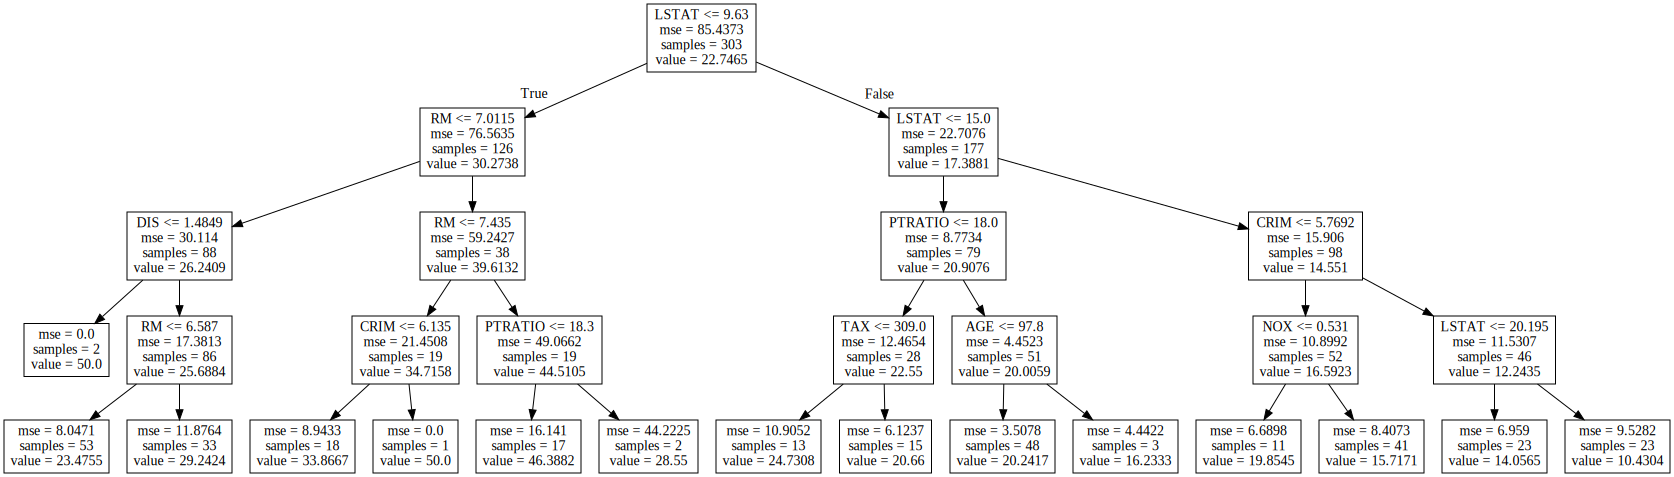

In [11]:
dot_data = externals.six.StringIO()
tree.export_graphviz(model, out_file = dot_data, feature_names = X.columns)
%dotstr dot_data.getvalue()

> Cool, no?

> ### Question 7.  What are the top 3 most important features?

In [12]:
sorted(zip(model.feature_importances_, X.columns.values), reverse = True)

[(0.60601552376139978, 'LSTAT'),
 (0.27144690890370021, 'RM'),
 (0.049512378738860802, 'DIS'),
 (0.030352605575489709, 'CRIM'),
 (0.029418809372699209, 'PTRATIO'),
 (0.0063633136452027617, 'NOX'),
 (0.0049461750578529539, 'TAX'),
 (0.001944284944794586, 'AGE'),
 (0.0, 'ZN'),
 (0.0, 'RAD'),
 (0.0, 'INDUS'),
 (0.0, 'CHAS'),
 (0.0, 'BLACK')]

Answer: `LSTAT`, `RM`, and `DIS`

## Part B | Classification Decision Trees

> ### Question 8.  Let's categorize `MEDV` to 4 groups: Bottom 20% as Level 1, next 30% as Level 2, next 30% categorized as Level 3, and the top 20% as Level 4.  Please create a new variable `MEDV_Category` that stores the level number

In [13]:
level_2 = ((df.MEDV > df.MEDV.quantile(.2)) & (df.MEDV <= df.MEDV.quantile(.5)))
level_3 = ((df.MEDV > df.MEDV.quantile(.5)) & (df.MEDV <= df.MEDV.quantile(.8)))
level_4 = (df.MEDV > df.MEDV.quantile(.8))

df['MEDV_Category'] = '1'
df.loc[level_2, 'MEDV_Category'] = '2'
df.loc[level_3, 'MEDV_Category'] = '3'
df.loc[level_4, 'MEDV_Category'] = '4'

> ### Question 9.  Create a feature matrix `X` with all features but `MEDV`.  Also create a response vector `y` with `MEDV_Category`

In [14]:
X = df[df.columns.values]
X.drop(['MEDV', 'MEDV_Category'], axis = 1, inplace = True)

y = df.MEDV_Category

> ### Question 10.  Split again your dataset into a training and testing sets (60%, 40%)

In [15]:
train_X, test_X, train_y, test_y = model_selection.train_test_split(X, y, train_size = .6, random_state = 0)

> ### Question 11.  Create a decision tree (`tree.DecisionTreeClassifier`) of depth 2 and with leaf nodes having a minimum of 5 observations.  Then train the model model

- (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier)

In [16]:
model = tree.DecisionTreeClassifier(max_depth = 2,
    min_samples_leaf = 5,
    random_state = 0).\
        fit(train_X, train_y)

> ### Question 12.  What is your 10-fold cross-validation error on your training set?

In [17]:
model_selection.cross_val_score(model, train_X, train_y, cv = 10).mean()

0.56437692012288787

Answer: ~.56

> ### Question 13.  Display graphically your model

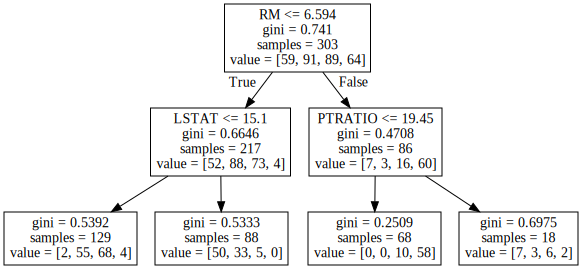

In [18]:
dot_data = externals.six.StringIO()
tree.export_graphviz(model, out_file = dot_data, feature_names = X.columns)
%dotstr dot_data.getvalue()

> ### Question 14.  What are the features used by the model?

In [19]:
sorted(zip(model.feature_importances_, X.columns.values), reverse = True)

[(0.50764359922462399, 'RM'),
 (0.35370148958476544, 'LSTAT'),
 (0.13865491119061069, 'PTRATIO'),
 (0.0, 'ZN'),
 (0.0, 'TAX'),
 (0.0, 'RAD'),
 (0.0, 'NOX'),
 (0.0, 'INDUS'),
 (0.0, 'DIS'),
 (0.0, 'CRIM'),
 (0.0, 'CHAS'),
 (0.0, 'BLACK'),
 (0.0, 'AGE')]

Answer: `RM`, `LSTAT`, and `PTRATIO`

## Part C | Random Forest with Categorical Variables

> ### Question 15.  Create a Random Forest Classifier with `n_estimators = 1000, max_features = 4, min_samples_leaf = 5, oob_score = True`

- (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier)

In [20]:
model = ensemble.RandomForestClassifier(n_estimators = 1000,
        max_features = 4,
        min_samples_leaf = 5,
        oob_score = True,
        random_state = 0).\
    fit(train_X, train_y)

> ### Question 16.  What is the Out-of-Bag (OOB) error?

(Out-of-Bag (OOB) error, also called "out-of-bag estimate", is a method of measuring the prediction error of random forestswhen sub-sample data was used for training.  OOB is the mean prediction error on each training sample $x_i$, using only the trees that did not have $x_i$ in their bootstrap sample)

In [21]:
model.oob_score_

0.69306930693069302

Answer: ~.69

> ### Question 17.  What is your 10-fold cross-validation error on your training set?

In [22]:
model_selection.cross_val_score(model, train_X, train_y, cv = 10).mean()

0.69720046082949305

Answer: ~.70